## Import library


In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from imblearn.combine import SMOTETomek
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from scipy.stats import truncnorm

from datetime import datetime

## Data Exploration


In [30]:
# Import data
df = pd.read_csv("metaverse_transactions_dataset.csv")

In [31]:
df.head()

,timestamp,hour_of_day,sending_address,receiving_address,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,2022-04-11 12:47:27,12,0x9d32d0bf2c00f41ce7ca01b66e174cc4dcb0c1da,0x39f82e1c09bc6d7baccc1e79e5621ff812f50572,796.949206,transfer,Europe,192.000,3,48,focused,established,18.75,low_risk
1,2022-06-14 19:12:46,19,0xd6e251c23cbf52dbd472f079147873e655d8096f,0x51e8fbe24f124e0e30a614e14401b9bbfed5384c,0.010000,purchase,South America,172.000,5,61,focused,established,25.00,low_risk
2,2022-01-18 16:26:59,16,0x2e0925b922fed01f6a85d213ae2718f54b8ca305,0x52c7911879f783d590af45bda0c0ef2b8536706f,778.197390,purchase,Asia,192.168,3,74,focused,established,31.25,low_risk
3,2022-06-15 09:20:04,9,0x93efefc25fcaf31d7695f28018d7a11ece55457f,0x8ac3b7bd531b3a833032f07d4e47c7af6ea7bace,300.838358,transfer,South America,172.000,8,111,high_value,veteran,36.75,low_risk
4,2022-02-18 14:35:30,14,0xad3b8de45d63f5cce28aef9a82cf30c397c6ceb9,0x6fdc047c2391615b3facd79b4588c7e9106e49f2,775.569344,sale,Africa,172.160,6,100,high_value,veteran,62.50,moderate_risk


In [32]:
# Check data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78600 entries, 0 to 78599
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp          78600 non-null  object 
 1   hour_of_day        78600 non-null  int64  
 2   sending_address    78600 non-null  object 
 3   receiving_address  78600 non-null  object 
 4   amount             78600 non-null  float64
 5   transaction_type   78600 non-null  object 
 6   location_region    78600 non-null  object 
 7   ip_prefix          78600 non-null  float64
 8   login_frequency    78600 non-null  int64  
 9   session_duration   78600 non-null  int64  
 10  purchase_pattern   78600 non-null  object 
 11  age_group          78600 non-null  object 
 12  risk_score         78600 non-null  float64
 13  anomaly            78600 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 8.4+ MB


In [33]:
# Check data description
df.describe()

,hour_of_day,amount,ip_prefix,login_frequency,session_duration,risk_score
count,78600.000000,78600.000000,78600.000000,78600.000000,78600.000000,78600.000000
mean,11.532634,502.574903,147.644430,4.178702,69.684606,44.956722
std,6.935897,245.898146,69.388143,2.366038,40.524476,21.775365
min,0.000000,0.010000,10.000000,1.000000,20.000000,15.000000
25%,6.000000,331.319966,172.000000,2.000000,35.000000,26.250000
50%,12.000000,500.029500,172.160000,4.000000,60.000000,40.000000
75%,18.000000,669.528311,192.000000,6.000000,100.000000,52.500000
max,23.000000,1557.150905,192.168000,8.000000,159.000000,100.000000


In [34]:
df.columns

Index(['timestamp', 'hour_of_day', 'sending_address', 'receiving_address',
       'amount', 'transaction_type', 'location_region', 'ip_prefix',
       'login_frequency', 'session_duration', 'purchase_pattern', 'age_group',
       'risk_score', 'anomaly'],
      dtype='object')

In [35]:
# Check missing value
df.isna().sum()

timestamp            0
hour_of_day          0
sending_address      0
receiving_address    0
amount               0
transaction_type     0
location_region      0
ip_prefix            0
login_frequency      0
session_duration     0
purchase_pattern     0
age_group            0
risk_score           0
anomaly              0
dtype: int64

## Data Preparation


In [36]:
# Drop unnecessary data
df=df.drop(['sending_address', 'receiving_address','ip_prefix'],axis=1)
df.head()

,timestamp,hour_of_day,amount,transaction_type,location_region,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,2022-04-11 12:47:27,12,796.949206,transfer,Europe,3,48,focused,established,18.75,low_risk
1,2022-06-14 19:12:46,19,0.010000,purchase,South America,5,61,focused,established,25.00,low_risk
2,2022-01-18 16:26:59,16,778.197390,purchase,Asia,3,74,focused,established,31.25,low_risk
3,2022-06-15 09:20:04,9,300.838358,transfer,South America,8,111,high_value,veteran,36.75,low_risk
4,2022-02-18 14:35:30,14,775.569344,sale,Africa,6,100,high_value,veteran,62.50,moderate_risk


In [37]:
# Change object to timestamp
df['timestamp']=pd.to_datetime(df['timestamp'])
df.head()

,timestamp,hour_of_day,amount,transaction_type,location_region,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,2022-04-11 12:47:27,12,796.949206,transfer,Europe,3,48,focused,established,18.75,low_risk
1,2022-06-14 19:12:46,19,0.010000,purchase,South America,5,61,focused,established,25.00,low_risk
2,2022-01-18 16:26:59,16,778.197390,purchase,Asia,3,74,focused,established,31.25,low_risk
3,2022-06-15 09:20:04,9,300.838358,transfer,South America,8,111,high_value,veteran,36.75,low_risk
4,2022-02-18 14:35:30,14,775.569344,sale,Africa,6,100,high_value,veteran,62.50,moderate_risk


In [38]:
# Sort timestamp and reset index
df=df.sort_values('timestamp')
df=df.reset_index()
df=df.drop('index',axis=1)
df.head()

,timestamp,hour_of_day,amount,transaction_type,location_region,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,2022-01-01 00:00:45,0,592.024530,transfer,South America,6,84,high_value,veteran,49.6125,low_risk
1,2022-01-01 00:12:24,0,755.500717,transfer,North America,3,70,focused,established,25.3125,low_risk
2,2022-01-01 00:14:54,0,247.716361,transfer,Asia,5,54,focused,established,20.2500,low_risk
3,2022-01-01 00:27:12,0,422.789709,purchase,North America,4,62,focused,established,35.4375,low_risk
4,2022-01-01 00:36:27,0,353.949174,sale,South America,7,94,high_value,veteran,70.8750,moderate_risk


In [39]:
df.isna().sum()

timestamp           0
hour_of_day         0
amount              0
transaction_type    0
location_region     0
login_frequency     0
session_duration    0
purchase_pattern    0
age_group           0
risk_score          0
anomaly             0
dtype: int64

In [40]:
df.describe()

,timestamp,hour_of_day,amount,login_frequency,session_duration,risk_score
count,78600,78600.000000,78600.000000,78600.000000,78600.000000,78600.000000
mean,2022-07-02 15:42:18.166437888,11.532634,502.574903,4.178702,69.684606,44.956722
min,2022-01-01 00:00:45,0.000000,0.010000,1.000000,20.000000,15.000000
25%,2022-04-02 02:37:59.500000,6.000000,331.319966,2.000000,35.000000,26.250000
50%,2022-07-02 17:46:33,12.000000,500.029500,4.000000,60.000000,40.000000
75%,2022-10-02 09:00:14,18.000000,669.528311,6.000000,100.000000,52.500000
max,2022-12-31 23:47:40,23.000000,1557.150905,8.000000,159.000000,100.000000
std,NaN,6.935897,245.898146,2.366038,40.524476,21.775365


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78600 entries, 0 to 78599
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   timestamp         78600 non-null  datetime64[ns]
 1   hour_of_day       78600 non-null  int64         
 2   amount            78600 non-null  float64       
 3   transaction_type  78600 non-null  object        
 4   location_region   78600 non-null  object        
 5   login_frequency   78600 non-null  int64         
 6   session_duration  78600 non-null  int64         
 7   purchase_pattern  78600 non-null  object        
 8   age_group         78600 non-null  object        
 9   risk_score        78600 non-null  float64       
 10  anomaly           78600 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 6.6+ MB


## Univariate analysis


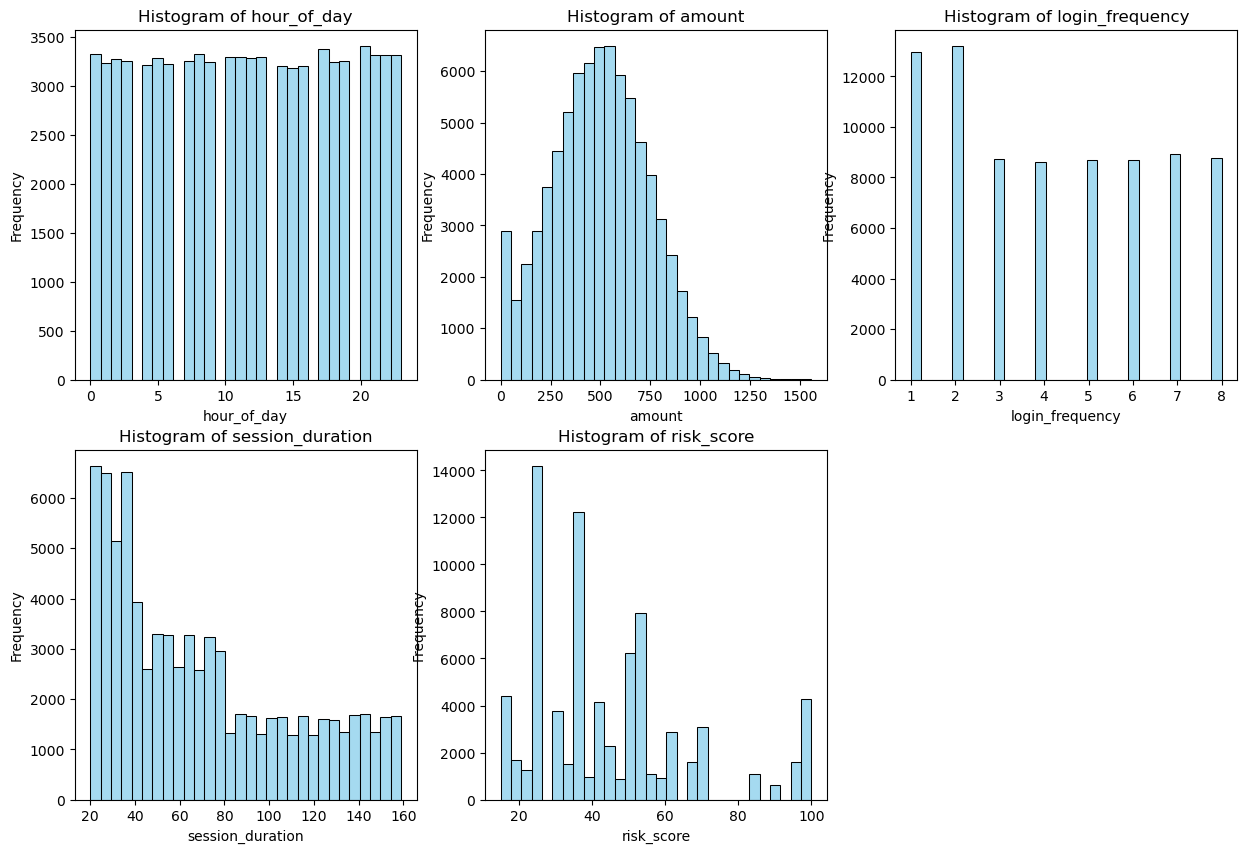

In [42]:
# Plot numerical variables distribution
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

n_cols = 3
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 5 * n_rows))
for i, column in enumerate(numeric_columns):
    plt.subplot(n_rows, n_cols, i + 1)  # Creates subplot for each histogram
    sns.histplot(df[column], kde=False, bins=30, color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')


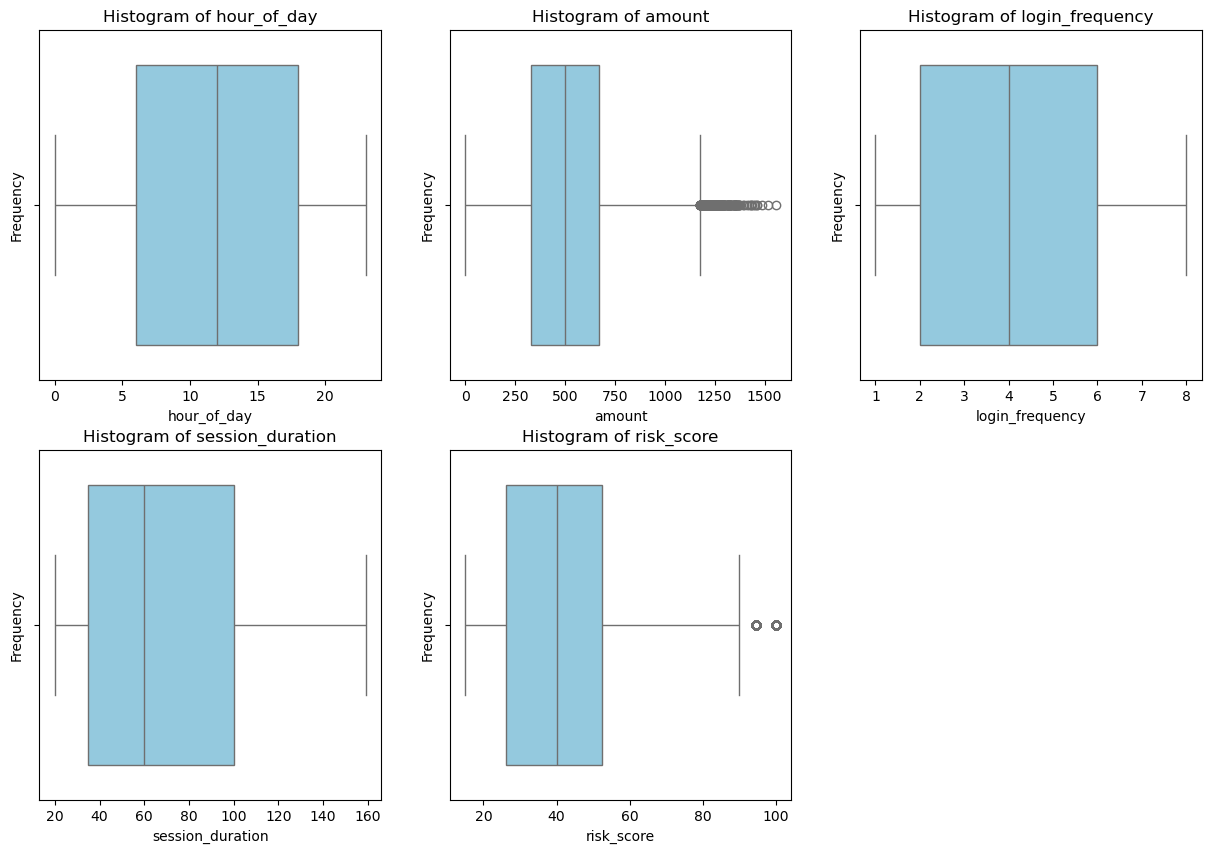

In [43]:
# Plot numerical variables distribution
plt.figure(figsize=(15, 5 * n_rows))
for i, column in enumerate(numeric_columns):
    plt.subplot(n_rows, n_cols, i + 1)  # Creates subplot for each histogram
    sns.boxplot(data= df, x=df[column], color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

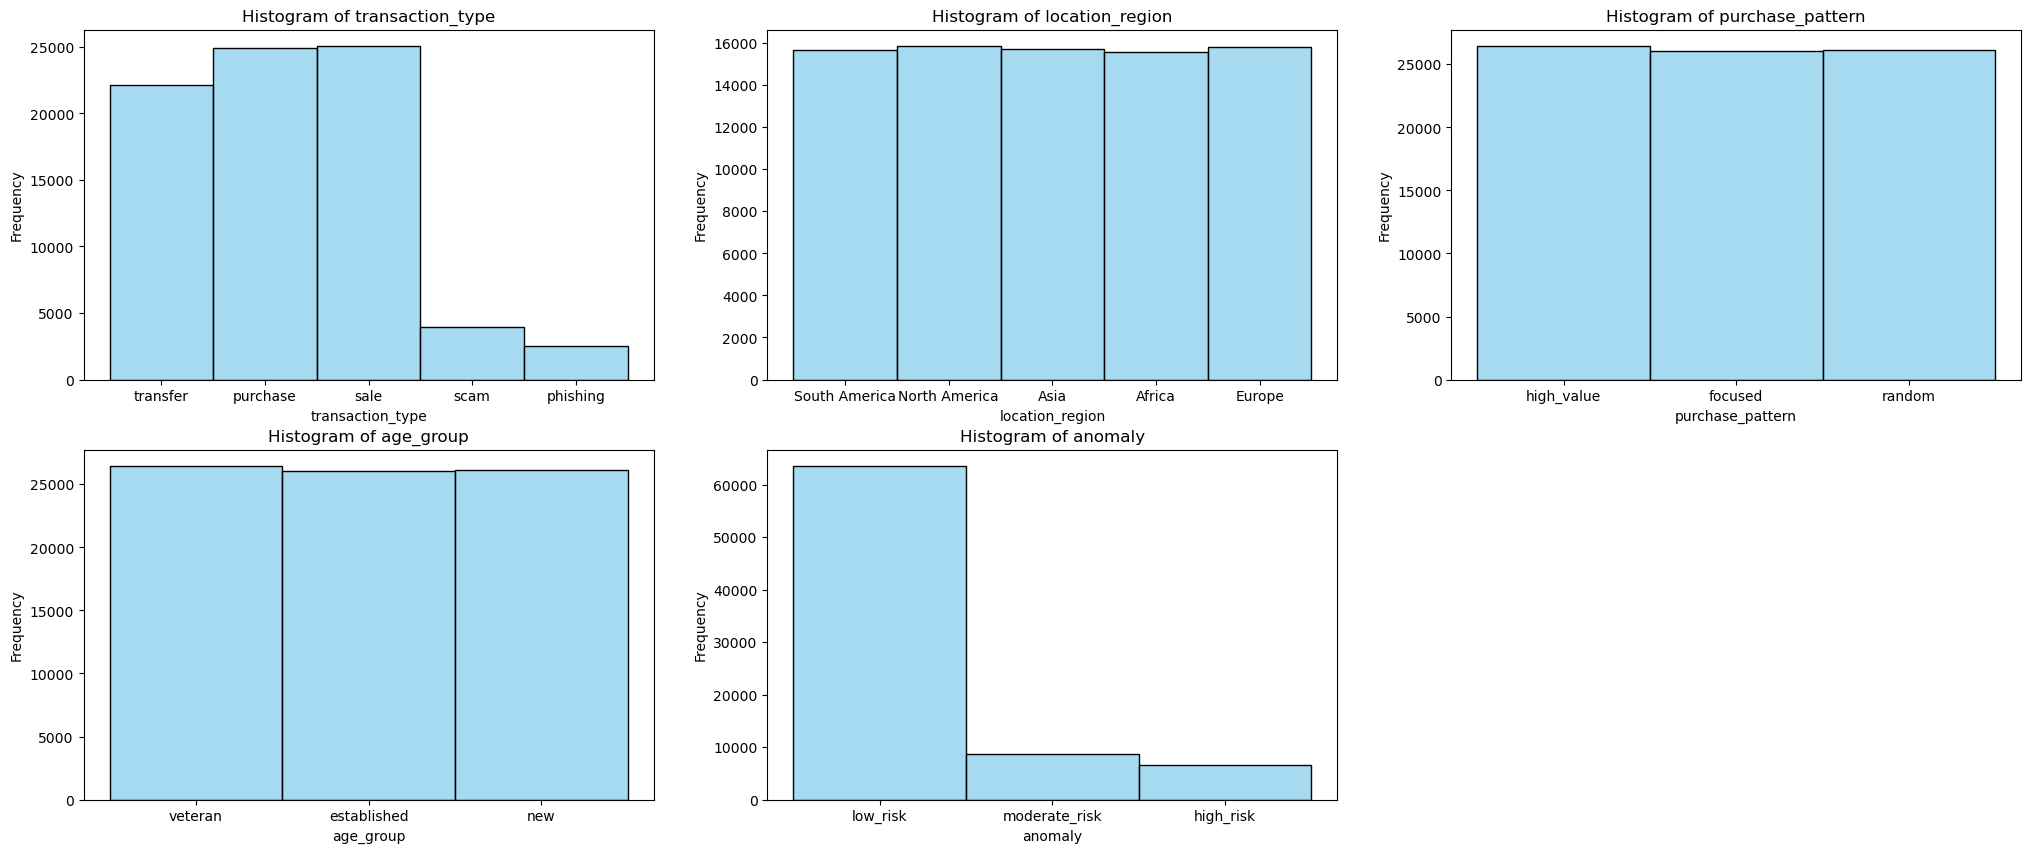

In [44]:
# plot catergorical variable distribution
categorical_columns = df.select_dtypes(include=['object']).columns
n_cols = 3
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols

plt.figure(figsize=(25, 5 * n_rows))
for i, column in enumerate(categorical_columns):
    plt.subplot(n_rows, n_cols, i + 1)  # Creates subplot for each histogram
    sns.histplot(df[column], kde=False, bins=30, color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

## Bivariate analysis


### Plot distribution of risk score group by categorical feature


In [45]:
categorical_columns

Index(['transaction_type', 'location_region', 'purchase_pattern', 'age_group',
       'anomaly'],
      dtype='object')

C:\Users\fsukr\AppData\Local\Temp\ipykernel_19476\356769766.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='transaction_type', y='risk_score', data=df, ax=axes[0], ci=None)
C:\Users\fsukr\AppData\Local\Temp\ipykernel_19476\356769766.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='location_region', y='risk_score', data=df, ax=axes[1], ci=None)
C:\Users\fsukr\AppData\Local\Temp\ipykernel_19476\356769766.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='purchase_pattern', y='risk_score', data=df, ax=axes[2], ci=None)
C:\Users\fsukr\AppData\Local\Temp\ipykernel_19476\356769766.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='age_group', y='risk_score', data=df, ax=axes[3], ci=None)
C:\Users\fsukr\AppData\Local\Temp\ipykerne

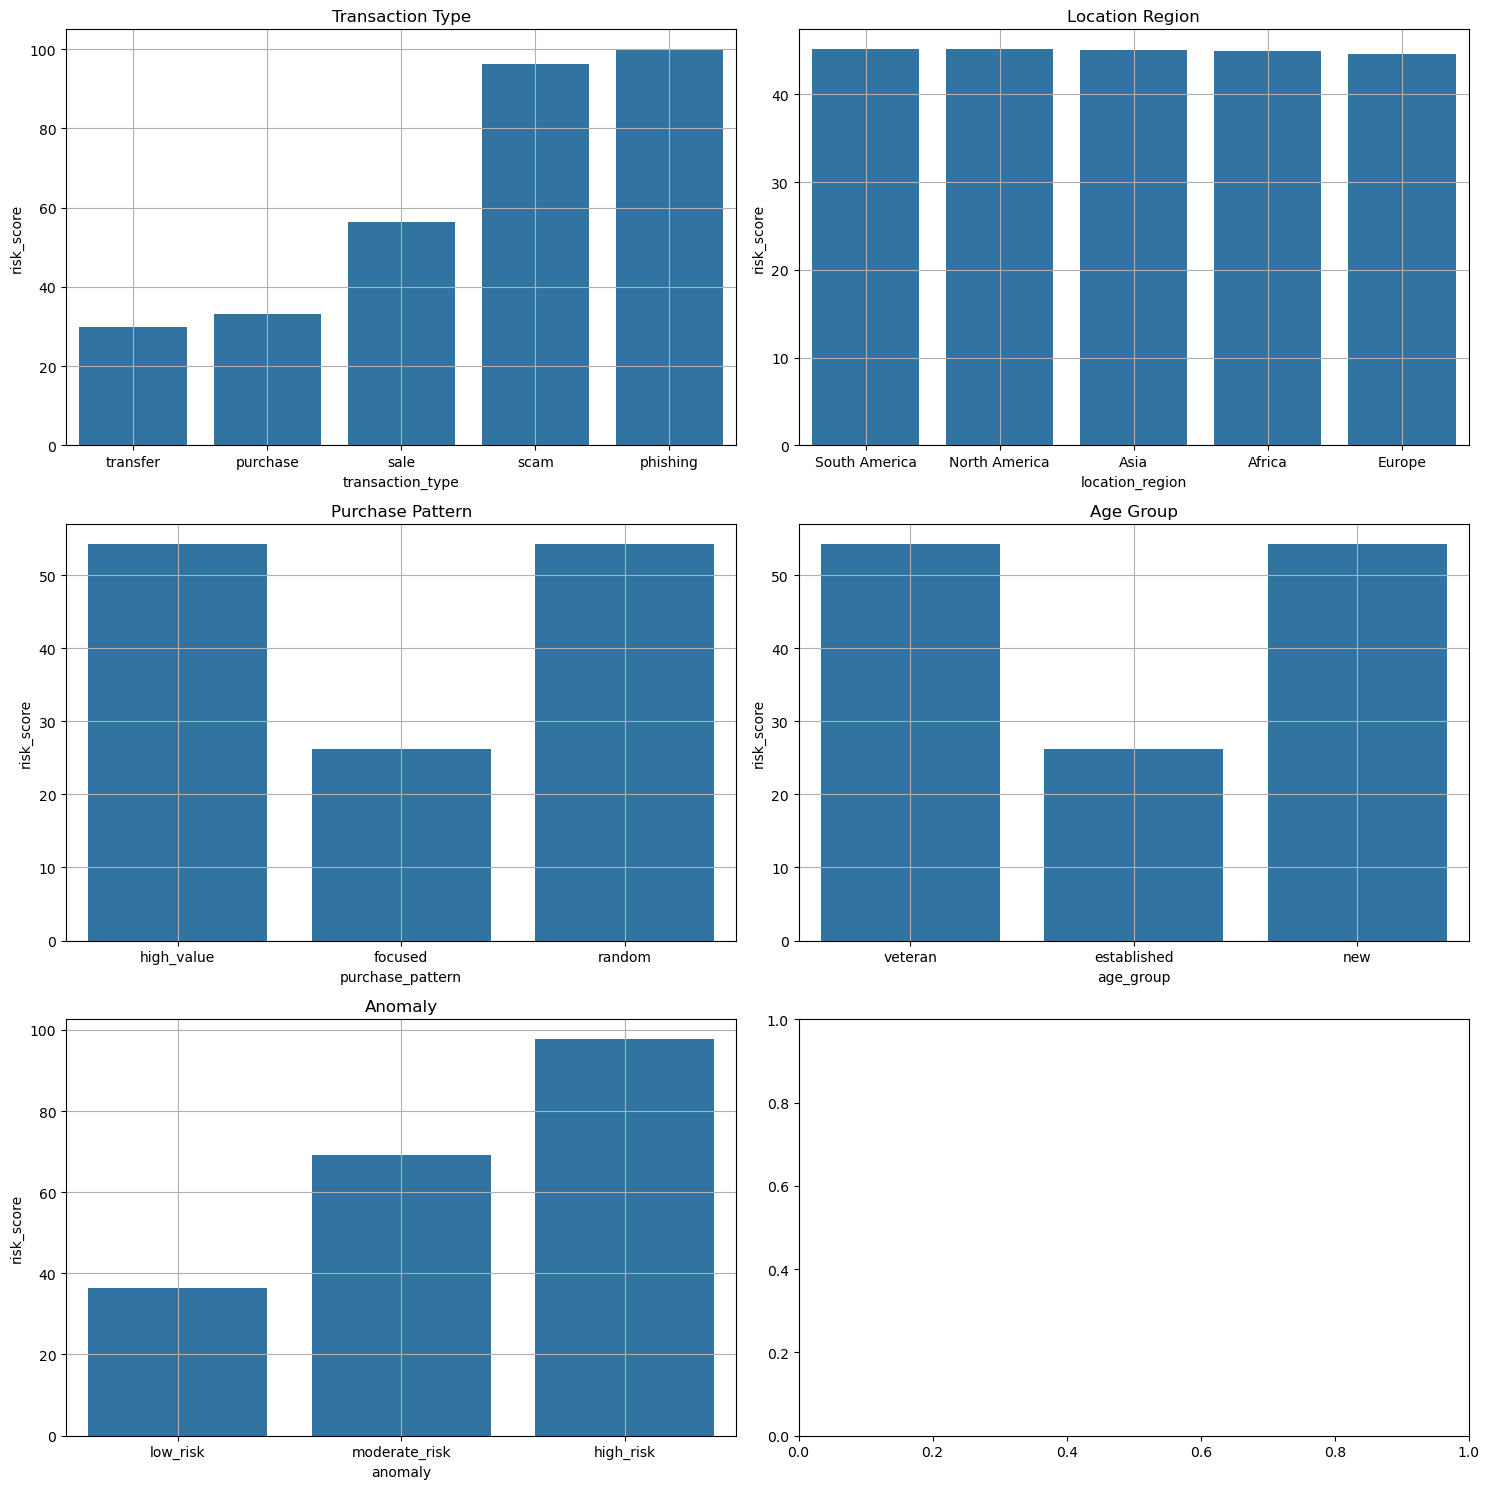

In [46]:
# Setting up the subplot grid
fig, axes = plt.subplots(3, 2, figsize=(15, 15))  # Adjust the layout and size as needed
axes = axes.ravel()

# Plot each bar chart in a different subplot
sns.barplot(x='transaction_type', y='risk_score', data=df, ax=axes[0], ci=None)
axes[0].set_title('Transaction Type')
axes[0].grid(True)

sns.barplot(x='location_region', y='risk_score', data=df, ax=axes[1], ci=None)
axes[1].set_title('Location Region')
axes[1].grid(True)

sns.barplot(x='purchase_pattern', y='risk_score', data=df, ax=axes[2], ci=None)
axes[2].set_title('Purchase Pattern')
axes[2].grid(True)

sns.barplot(x='age_group', y='risk_score', data=df, ax=axes[3], ci=None)
axes[3].set_title('Age Group')
axes[3].grid(True)

sns.barplot(x='anomaly', y='risk_score', data=df, ax=axes[4], ci=None)
axes[4].set_title('Anomaly')
axes[4].grid(True)

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

### Plot distribution of risk score group by numerical feature


In [47]:
numeric_columns

Index(['hour_of_day', 'amount', 'login_frequency', 'session_duration',
       'risk_score'],
      dtype='object')

C:\Users\fsukr\AppData\Local\Temp\ipykernel_19476\3509604634.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='hour_of_day', y='risk_score', data=df, ci=None)


<Axes: xlabel='hour_of_day', ylabel='risk_score'>

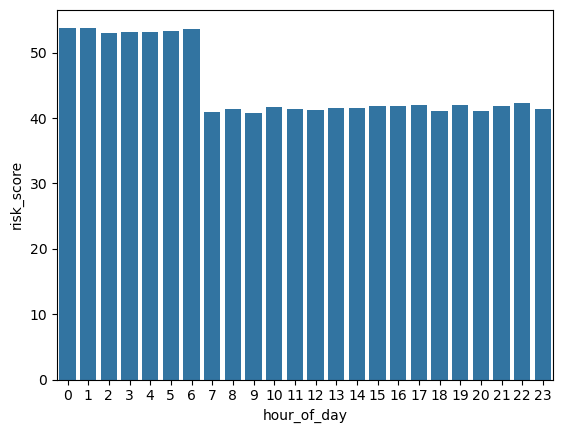

In [48]:
# Plot hour of day with risk score
sns.barplot(x='hour_of_day', y='risk_score', data=df, ci=None)

C:\Users\fsukr\AppData\Local\Temp\ipykernel_19476\623331788.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='login_frequency', y='risk_score', data=df, ci=None)


<Axes: xlabel='login_frequency', ylabel='risk_score'>

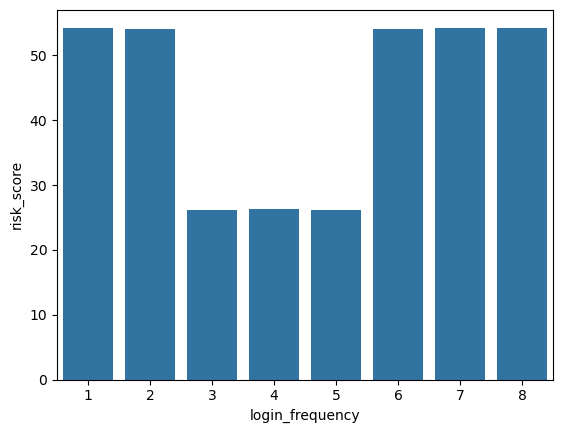

In [49]:
# Plot log in frequency with risk score
sns.barplot(x='login_frequency', y='risk_score', data=df, ci=None)

## Label encode


In [50]:
categorical_columns

Index(['transaction_type', 'location_region', 'purchase_pattern', 'age_group',
       'anomaly'],
      dtype='object')

In [51]:
df[categorical_columns].nunique()

transaction_type    5
location_region     5
purchase_pattern    3
age_group           3
anomaly             3
dtype: int64

In [52]:
for column in df[categorical_columns]:
    print(f"Unique values in '{column}': {df[column].unique()}")

Unique values in 'transaction_type': ['transfer' 'purchase' 'sale' 'scam' 'phishing']
Unique values in 'location_region': ['South America' 'North America' 'Asia' 'Africa' 'Europe']
Unique values in 'purchase_pattern': ['high_value' 'focused' 'random']
Unique values in 'age_group': ['veteran' 'established' 'new']
Unique values in 'anomaly': ['low_risk' 'moderate_risk' 'high_risk']


In [53]:
label_encoding = {
    "transaction_type":{"transfer":0,"purchase":1,"sale":2,"scam":3,"phishing":4},
    "location_region":{"South America":0,"North America":1,"Asia":2,"Africa":3,"Europe":4},
    "purchase_pattern":{"high_value":0,"focused":1,"random":2},
    "age_group":{"veteran":0,"established":1,"new":2},
    "anomaly":{"low_risk":0,"moderate_risk":1,"high_risk":2},
}
df_labeled = df.replace(label_encoding)

In [54]:
df_labeled.head()

,timestamp,hour_of_day,amount,transaction_type,location_region,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,2022-01-01 00:00:45,0,592.024530,0,0,6,84,0,0,49.6125,0
1,2022-01-01 00:12:24,0,755.500717,0,1,3,70,1,1,25.3125,0
2,2022-01-01 00:14:54,0,247.716361,0,2,5,54,1,1,20.2500,0
3,2022-01-01 00:27:12,0,422.789709,1,1,4,62,1,1,35.4375,0
4,2022-01-01 00:36:27,0,353.949174,2,0,7,94,0,0,70.8750,1


## Correlation


<Axes: >

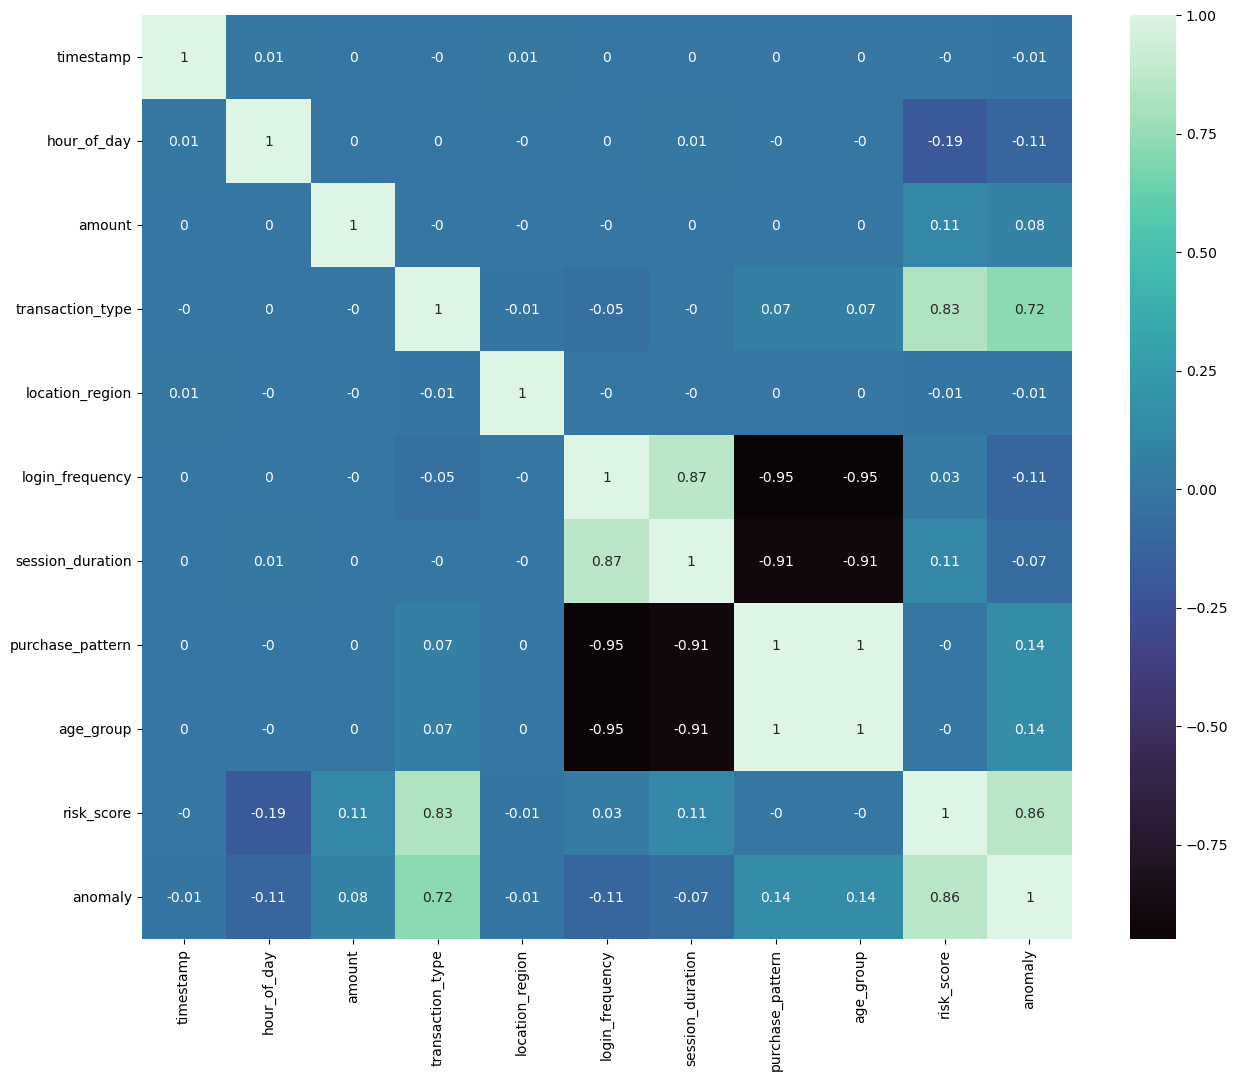

In [55]:
# Correlation heatmap
corr = df_labeled.corr().round(2)
plt.figure(figsize=(15,12))
sns.heatmap(data=corr,cmap='mako', cbar=True, annot=True)

## Model


In [56]:
df_labeled.columns

Index(['timestamp', 'hour_of_day', 'amount', 'transaction_type',
       'location_region', 'login_frequency', 'session_duration',
       'purchase_pattern', 'age_group', 'risk_score', 'anomaly'],
      dtype='object')

In [57]:
numeric_columns

Index(['hour_of_day', 'amount', 'login_frequency', 'session_duration',
       'risk_score'],
      dtype='object')

In [58]:
categorical_columns

Index(['transaction_type', 'location_region', 'purchase_pattern', 'age_group',
       'anomaly'],
      dtype='object')

In [59]:
# Split feature and target
X = df_labeled[['hour_of_day', 'amount', 'login_frequency', 'session_duration', 'risk_score','transaction_type', 'location_region', 'purchase_pattern', 'age_group']]
y = df_labeled['anomaly']

In [60]:
X.shape

(78600, 9)

In [61]:
y.shape

(78600,)

In [62]:
scaler = MinMaxScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

C:\Users\fsukr\AppData\Local\Temp\ipykernel_19476\2372940263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numeric_columns] = scaler.fit_transform(X[numeric_columns])


In [63]:
X.describe()

,hour_of_day,amount,login_frequency,session_duration,risk_score,transaction_type,location_region,purchase_pattern,age_group
count,78600.000000,78600.000000,78600.000000,78600.000000,78600.000000,78600.000000,78600.000000,78600.000000,78600.000000
mean,0.501419,0.322749,0.454100,0.357443,0.352432,1.234746,1.999860,0.996476,0.996476
std,0.301561,0.157916,0.338005,0.291543,0.256181,1.018560,1.414659,0.817794,0.817794
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.260870,0.212768,0.142857,0.107914,0.132353,0.000000,1.000000,0.000000,0.000000
50%,0.521739,0.321114,0.428571,0.287770,0.294118,1.000000,2.000000,1.000000,1.000000
75%,0.782609,0.429966,0.714286,0.575540,0.441176,2.000000,3.000000,2.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,2.000000,2.000000


In [64]:
skf = StratifiedKFold()
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

TRAIN: [15525 15528 15532 ... 78597 78598 78599] TEST: [    0     1     2 ... 15833 15858 15873]
TRAIN: [    0     1     2 ... 78597 78598 78599] TEST: [15525 15528 15532 ... 31498 31499 31500]
TRAIN: [    0     1     2 ... 78597 78598 78599] TEST: [31228 31230 31234 ... 47337 47338 47339]
TRAIN: [    0     1     2 ... 78597 78598 78599] TEST: [46378 46388 46400 ... 62930 62932 62935]
TRAIN: [    0     1     2 ... 62930 62932 62935] TEST: [62465 62500 62513 ... 78597 78598 78599]


In [55]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234, stratify=y)

In [65]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (62880, 9)
X_test shape: (15720, 9)
y_train shape: (62880,)
y_test shape: (15720,)


In [66]:
# Handling imbalance data
smt = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled  = smt.fit_resample(X_train, y_train)

In [67]:
print(f"Original Training target statistics: {pd.Series(y_train).value_counts()}")
print(f"Resampled Training target statistics: {pd.Series(y_train_resampled).value_counts()}")

Original Training target statistics: anomaly
0    50796
1     6888
2     5196
Name: count, dtype: int64
Resampled Training target statistics: anomaly
0    50796
1    50796
2    50796
Name: count, dtype: int64


### KNN


In [117]:
# Find best parameter for KNN
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', verbose=1)
grid.fit(X_train_resampled, y_train_resampled)
print("Best parameters:", grid.best_params_)
print("Best cross-validation score:", grid.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
Best cross-validation score: 1.0


In [68]:
knn = KNeighborsClassifier(n_neighbors=1, metric = 'euclidean', p = 2, weights= 'uniform')
knn.fit(X_train_resampled, y_train_resampled)
y_pred = knn.predict(X_test)

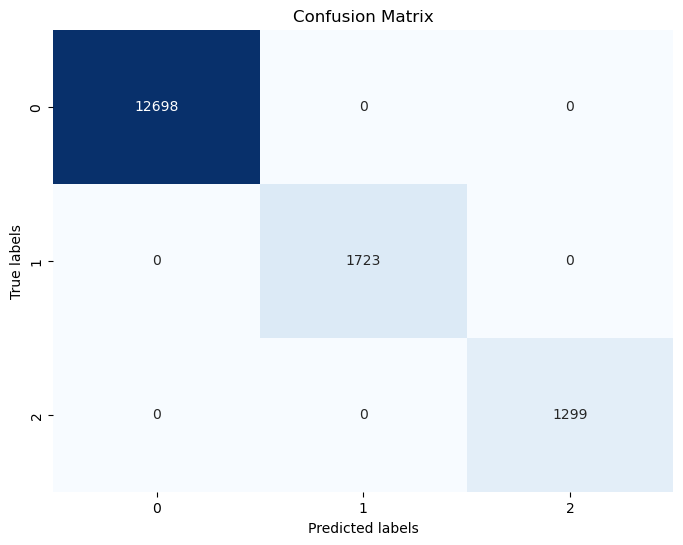

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12698
           1       1.00      1.00      1.00      1723
           2       1.00      1.00      1.00      1299

    accuracy                           1.00     15720
   macro avg       1.00      1.00      1.00     15720
weighted avg       1.00      1.00      1.00     15720



In [69]:
# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

classification_knn = (classification_report(y_test, y_pred))
print(classification_knn)

### Decision tree


In [72]:
# Find best parameter for decision tree
parameters = {'max_depth': [11, 13, 15, 17, 19, 21, 23],
              'min_samples_split': [9, 11, 13, 15, 17, 19],
              'criterion': ['entropy', 'gini']
             }

dt_classifier = DecisionTreeClassifier(random_state=1234)
gridDecisionTree = RandomizedSearchCV(dt_classifier, parameters, cv = 5)
gridDecisionTree.fit(X_train_resampled, y_train_resampled)

print('Mín Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

Mín Split:  11
Max Nvl:  19
Algorithm:  gini
Score:  1.0


In [73]:
decision_tree = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 11, max_depth= 19, random_state=1234)
decision_tree.fit(X_train_resampled, y_train_resampled)
y_pred_dt = decision_tree.predict(X_test)

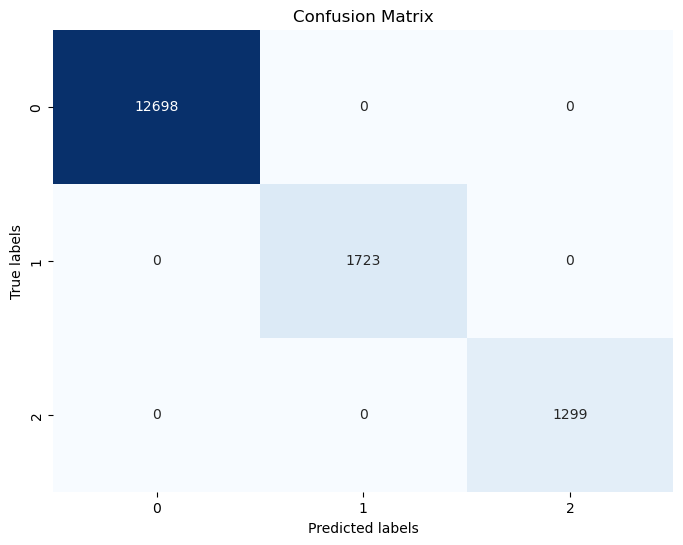

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12698
           1       1.00      1.00      1.00      1723
           2       1.00      1.00      1.00      1299

    accuracy                           1.00     15720
   macro avg       1.00      1.00      1.00     15720
weighted avg       1.00      1.00      1.00     15720



In [74]:
# Evaluate the model
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred_dt))

### Random forest


In [124]:
# Find best parameter for Random forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
rf_classifier = RandomForestClassifier(random_state=1234)
rf_grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, verbose=2)
rf_grid_search.fit(X_train_resampled, y_train_resampled)

print("Best parameters:", rf_grid_search.best_params_)
print("Best score:", rf_grid_search.best_score_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   2.7s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   2.7s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   2.7s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   5.5s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   5.3s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   5.3s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   2.6s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   2.6s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   2.6s
[CV] END max_depth=10, min_samples_split=5, n_estimators=200; total time=   5.4s
[CV] END max_depth=10, min_samples_split=5, n_estimators=200; total time=   5.3s
[CV] END max_depth=10, min_samples_split=5, n_es

In [75]:
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, random_state=1234)
rf_classifier.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf_classifier.predict(X_test)

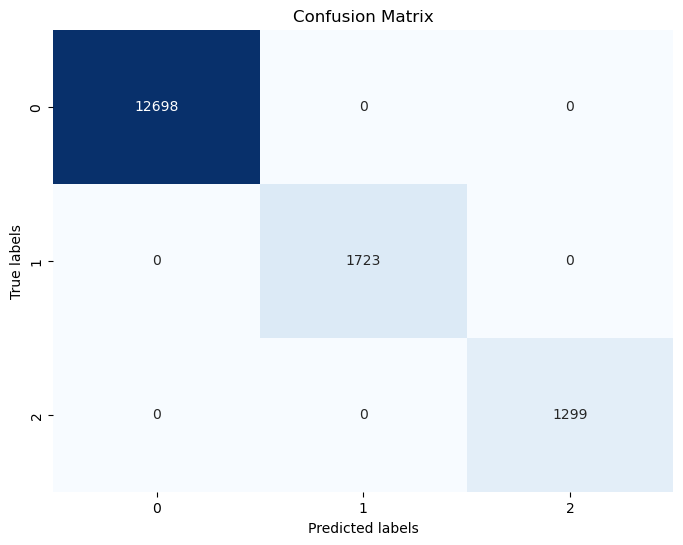

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12698
           1       1.00      1.00      1.00      1723
           2       1.00      1.00      1.00      1299

    accuracy                           1.00     15720
   macro avg       1.00      1.00      1.00     15720
weighted avg       1.00      1.00      1.00     15720



In [76]:
# Evaluate the model
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred_rf))

In [77]:
# Feature Importance
importances = rf_classifier.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

            Feature  Importance
4        risk_score    0.443782
5  transaction_type    0.246417
2   login_frequency    0.086690
3  session_duration    0.074302
8         age_group    0.057426
7  purchase_pattern    0.044784
0       hour_of_day    0.024651
1            amount    0.021932
6   location_region    0.000017


### Naive Bayes


In [129]:
# Find best parameter for Naive Bayes
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
gnb = GaussianNB()
grid_nb = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')
grid_nb.fit(X_train_resampled, y_train_resampled)

print("Best Parameters:", grid_nb.best_params_)
print("Best Cross-validation Score:", grid_nb.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'var_smoothing': 0.006579332246575682}
Best Cross-validation Score: 0.9306703991438893


In [78]:
nb_classifier = GaussianNB(var_smoothing=0.006579332246575682)
nb_classifier.fit(X_train_resampled, y_train_resampled)
y_pred_nb = nb_classifier.predict(X_test)

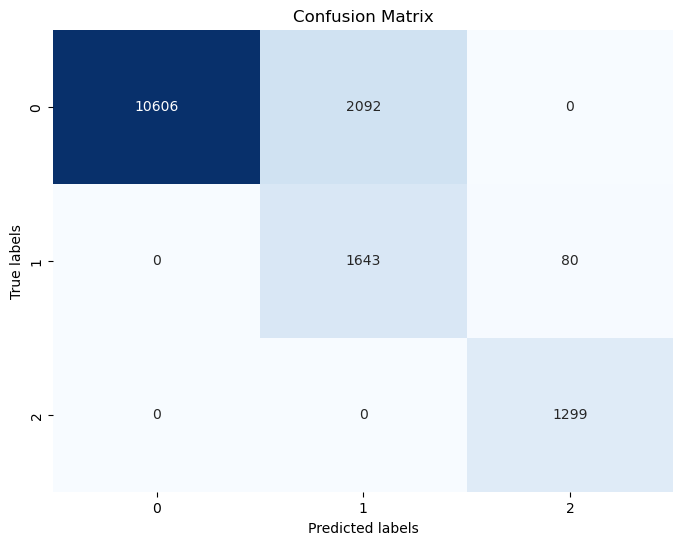

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.84      0.91     12698
           1       0.44      0.95      0.60      1723
           2       0.94      1.00      0.97      1299

    accuracy                           0.86     15720
   macro avg       0.79      0.93      0.83     15720
weighted avg       0.93      0.86      0.88     15720



In [79]:
# Evaluate the model
cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred_nb))

### Logistic Regression


In [80]:
log_reg = LogisticRegression()
log_reg.fit(X_train_resampled, y_train_resampled)
y_pred_lr = log_reg.predict(X_test)

c:\Users\fsukr\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


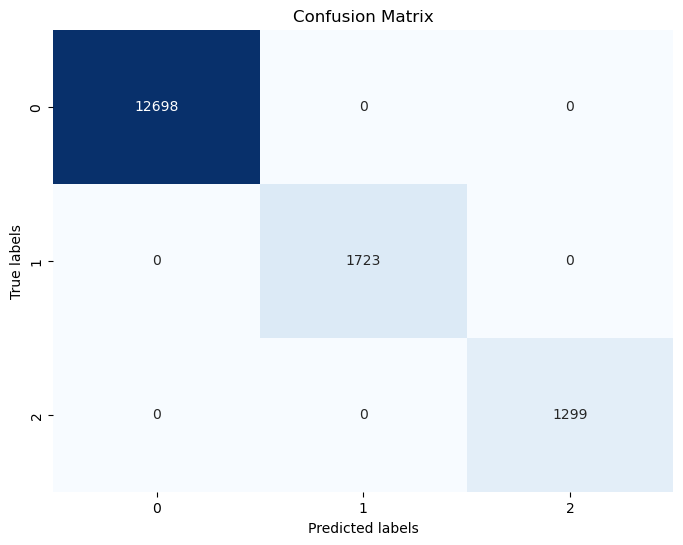

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12698
           1       1.00      1.00      1.00      1723
           2       1.00      1.00      1.00      1299

    accuracy                           1.00     15720
   macro avg       1.00      1.00      1.00     15720
weighted avg       1.00      1.00      1.00     15720



In [81]:
# Evaluate the model
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred_lr))

## Model performance evaluation


In [82]:
# Calculate evaluation metrics for KNN classifier
accuracy_knn = accuracy_score(y_test, y_pred)
precision_knn = precision_score(y_test, y_pred, average='macro')
recall_knn = recall_score(y_test, y_pred, average='macro')
f1_knn = f1_score(y_test, y_pred, average='macro')

# Calculate evaluation metrics for Decision Tree classifier
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='macro')
recall_dt = recall_score(y_test, y_pred_dt, average='macro')
f1_dt = f1_score(y_test, y_pred_dt, average='macro')

# Calculate evaluation metrics for Random Forest classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='macro')
recall_rf = recall_score(y_test, y_pred_rf, average='macro')
f1_rf = f1_score(y_test, y_pred_rf, average='macro')

# Calculate evaluation metrics for Naive Bayes classifier
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='macro')
recall_nb = recall_score(y_test, y_pred_nb, average='macro')
f1_nb = f1_score(y_test, y_pred_nb, average='macro')

# Calculate evaluation metrics for Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='macro')
recall_lr = recall_score(y_test, y_pred_lr, average='macro')
f1_lr = f1_score(y_test, y_pred_lr, average='macro')

resume = pd.DataFrame({
    'k-NN Classifier': [accuracy_knn, precision_knn, recall_knn, f1_knn],
    'Decision Tree Classifier': [accuracy_dt, precision_dt, recall_dt, f1_dt],
    'Random Forest Classifier': [accuracy_rf, precision_rf, recall_rf, f1_rf],
    'Naive bayes Classifier': [accuracy_nb, precision_nb, recall_nb, f1_nb],
    'Logistic Regression': [accuracy_lr, precision_lr, recall_lr, f1_lr],
}, index=['Accuracy', 'Precision', 'Recall', 'F1-score'])

print(resume)

           k-NN Classifier  Decision Tree Classifier  \
Accuracy               1.0                       1.0   
Precision              1.0                       1.0   
Recall                 1.0                       1.0   
F1-score               1.0                       1.0   

           Random Forest Classifier  Naive bayes Classifier  \
Accuracy                        1.0                0.861832   
Precision                       1.0                0.793960   
Recall                          1.0                0.929606   
F1-score                        1.0                0.827470   

           Logistic Regression  
Accuracy                   1.0  
Precision                  1.0  
Recall                     1.0  
F1-score                   1.0  


## Generate mockup data


In [83]:
numeric_columns

Index(['hour_of_day', 'amount', 'login_frequency', 'session_duration',
       'risk_score'],
      dtype='object')

In [98]:
df_labeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78600 entries, 0 to 78599
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   timestamp         78600 non-null  datetime64[ns]
 1   hour_of_day       78600 non-null  int64         
 2   amount            78600 non-null  float64       
 3   transaction_type  78600 non-null  int64         
 4   location_region   78600 non-null  int64         
 5   login_frequency   78600 non-null  int64         
 6   session_duration  78600 non-null  int64         
 7   purchase_pattern  78600 non-null  int64         
 8   age_group         78600 non-null  int64         
 9   risk_score        78600 non-null  float64       
 10  anomaly           78600 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(8)
memory usage: 6.6 MB


In [90]:
df_labeled.describe()

,timestamp,hour_of_day,amount,transaction_type,location_region,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
count,78600,78600.000000,78600.000000,78600.000000,78600.000000,78600.000000,78600.000000,78600.000000,78600.000000,78600.000000,78600.000000
mean,2022-07-02 15:42:18.166437888,11.532634,502.574903,1.234746,1.999860,4.178702,69.684606,0.996476,0.996476,44.956722,0.274822
min,2022-01-01 00:00:45,0.000000,0.010000,0.000000,0.000000,1.000000,20.000000,0.000000,0.000000,15.000000,0.000000
25%,2022-04-02 02:37:59.500000,6.000000,331.319966,0.000000,1.000000,2.000000,35.000000,0.000000,0.000000,26.250000,0.000000
50%,2022-07-02 17:46:33,12.000000,500.029500,1.000000,2.000000,4.000000,60.000000,1.000000,1.000000,40.000000,0.000000
75%,2022-10-02 09:00:14,18.000000,669.528311,2.000000,3.000000,6.000000,100.000000,2.000000,2.000000,52.500000,0.000000
max,2022-12-31 23:47:40,23.000000,1557.150905,4.000000,4.000000,8.000000,159.000000,2.000000,2.000000,100.000000,2.000000
std,NaN,6.935897,245.898146,1.018560,1.414659,2.366038,40.524476,0.817794,0.817794,21.775365,0.603794


In [243]:
corr

,timestamp,hour_of_day,amount,transaction_type,location_region,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
timestamp,1.00,0.01,0.00,-0.00,0.01,0.00,0.00,0.00,0.00,-0.00,-0.01
hour_of_day,0.01,1.00,0.00,0.00,-0.00,0.00,0.01,-0.00,-0.00,-0.19,-0.11
amount,0.00,0.00,1.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.11,0.08
transaction_type,-0.00,0.00,-0.00,1.00,-0.01,-0.05,-0.00,0.07,0.07,0.83,0.72
location_region,0.01,-0.00,-0.00,-0.01,1.00,-0.00,-0.00,0.00,0.00,-0.01,-0.01
login_frequency,0.00,0.00,-0.00,-0.05,-0.00,1.00,0.87,-0.95,-0.95,0.03,-0.11
session_duration,0.00,0.01,0.00,-0.00,-0.00,0.87,1.00,-0.91,-0.91,0.11,-0.07
purchase_pattern,0.00,-0.00,0.00,0.07,0.00,-0.95,-0.91,1.00,1.00,-0.00,0.14
age_group,0.00,-0.00,0.00,0.07,0.00,-0.95,-0.91,1.00,1.00,-0.00,0.14
risk_score,-0.00,-0.19,0.11,0.83,-0.01,0.03,0.11,-0.00,-0.00,1.00,0.86


In [248]:
# drop time stamp row
mock_corr = corr.drop('timestamp')

In [250]:
# drop timestamp column
mock_corr = mock_corr.drop(columns='timestamp')

In [251]:
# Check mock up correation
mock_corr

,hour_of_day,amount,transaction_type,location_region,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
hour_of_day,1.00,0.00,0.00,-0.00,0.00,0.01,-0.00,-0.00,-0.19,-0.11
amount,0.00,1.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.11,0.08
transaction_type,0.00,-0.00,1.00,-0.01,-0.05,-0.00,0.07,0.07,0.83,0.72
location_region,-0.00,-0.00,-0.01,1.00,-0.00,-0.00,0.00,0.00,-0.01,-0.01
login_frequency,0.00,-0.00,-0.05,-0.00,1.00,0.87,-0.95,-0.95,0.03,-0.11
session_duration,0.01,0.00,-0.00,-0.00,0.87,1.00,-0.91,-0.91,0.11,-0.07
purchase_pattern,-0.00,0.00,0.07,0.00,-0.95,-0.91,1.00,1.00,-0.00,0.14
age_group,-0.00,0.00,0.07,0.00,-0.95,-0.91,1.00,1.00,-0.00,0.14
risk_score,-0.19,0.11,0.83,-0.01,0.03,0.11,-0.00,-0.00,1.00,0.86
anomaly,-0.11,0.08,0.72,-0.01,-0.11,-0.07,0.14,0.14,0.86,1.00


In [258]:
mock_corr_array = np.array(mock_corr)

In [259]:
mock_corr_array

array([[ 1.  ,  0.  ,  0.  , -0.  ,  0.  ,  0.01, -0.  , -0.  , -0.19,
        -0.11],
       [ 0.  ,  1.  , -0.  , -0.  , -0.  ,  0.  ,  0.  ,  0.  ,  0.11,
         0.08],
       [ 0.  , -0.  ,  1.  , -0.01, -0.05, -0.  ,  0.07,  0.07,  0.83,
         0.72],
       [-0.  , -0.  , -0.01,  1.  , -0.  , -0.  ,  0.  ,  0.  , -0.01,
        -0.01],
       [ 0.  , -0.  , -0.05, -0.  ,  1.  ,  0.87, -0.95, -0.95,  0.03,
        -0.11],
       [ 0.01,  0.  , -0.  , -0.  ,  0.87,  1.  , -0.91, -0.91,  0.11,
        -0.07],
       [-0.  ,  0.  ,  0.07,  0.  , -0.95, -0.91,  1.  ,  1.  , -0.  ,
         0.14],
       [-0.  ,  0.  ,  0.07,  0.  , -0.95, -0.91,  1.  ,  1.  , -0.  ,
         0.14],
       [-0.19,  0.11,  0.83, -0.01,  0.03,  0.11, -0.  , -0.  ,  1.  ,
         0.86],
       [-0.11,  0.08,  0.72, -0.01, -0.11, -0.07,  0.14,  0.14,  0.86,
         1.  ]])

In [253]:
df_labeled.mean().array

<NumpyExtensionArray>
[Timestamp('2022-07-02 15:42:18.166437888'),
                          11.53263358778626,
                         502.57490270978695,
                         1.2347455470737914,
                         1.9998600508905853,
                          4.178702290076336,
                          69.68460559796438,
                         0.9964758269720102,
                         0.9964758269720102,
                          44.95672248727736,
                        0.27482188295165394]
Length: 11, dtype: object

In [254]:
df_labeled.std().array

<NumpyExtensionArray>
[Timedelta('105 days 13:57:10.261123210'),
                         6.93589733019824,
                       245.89814591282143,
                       1.0185602482607046,
                        1.414658806364368,
                        2.366038189597851,
                        40.52447562593376,
                       0.8177942513559266,
                       0.8177942513559266,
                       21.775365232177016,
                       0.6037935321182816]
Length: 11, dtype: object

In [255]:
df_labeled.min().array

<NumpyExtensionArray>
[Timestamp('2022-01-01 00:00:45'), 0, 0.01, 0, 0, 1, 20, 0, 0, 15.0, 0]
Length: 11, dtype: object

In [256]:
df_labeled.max().array

<NumpyExtensionArray>
[Timestamp('2022-12-31 23:47:40'),                               23,
                1557.150905156049,                                4,
                                4,                                8,
                              159,                                2,
                                2,                            100.0,
                                2]
Length: 11, dtype: object

In [260]:
# Define the number of variables and samples
num_vars = 10
num_samples = 5000

# Means and standard deviations
means = [11.53263358778626,
                         502.57490270978695,
                         1.2347455470737914,
                         1.9998600508905853,
                          4.178702290076336,
                          69.68460559796438,
                         0.9964758269720102,
                         0.9964758269720102,
                          44.95672248727736,
                        0.27482188295165394]
std_devs = [6.93589733019824,
                       245.89814591282143,
                       1.0185602482607046,
                        1.414658806364368,
                        2.366038189597851,
                        40.52447562593376,
                       0.8177942513559266,
                       0.8177942513559266,
                       21.775365232177016,
                       0.6037935321182816]

# Minimum and maximum values
min_vals = [0, 0.01, 0, 0, 1, 20, 0, 0, 15.0, 0]
max_vals = [23, 1557.150905156049, 4, 4, 8, 159, 2, 2, 100.0, 2]

# Example Correlation Matrix
R = np.array(mock_corr)

In [261]:
# Convert correlation matrix to covariance matrix
covariance_matrix = np.array([[R[i, j] * std_devs[i] * std_devs[j] for j in range(num_vars)] for i in range(num_vars)])

# Generate multivariate normal data
mock_data = np.random.multivariate_normal(means, covariance_matrix, size=num_samples)

In [264]:
for i in range(num_vars):
    mock_data[:, i] = np.clip(mock_data[:, i], min_vals[i], max_vals[i])

In [265]:
df_labeled.columns

Index(['timestamp', 'hour_of_day', 'amount', 'transaction_type',
       'location_region', 'login_frequency', 'session_duration',
       'purchase_pattern', 'age_group', 'risk_score', 'anomaly'],
      dtype='object')

In [283]:
mock_column_names = ['hour_of_day', 'amount', 'transaction_type',
       'location_region', 'login_frequency', 'session_duration',
       'purchase_pattern', 'age_group', 'risk_score', 'anomaly']
mock_df = pd.DataFrame(mock_data, columns=mock_column_names)

In [284]:
mock_df.describe()

,hour_of_day,amount,transaction_type,location_region,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,11.555814,493.214171,1.274108,2.030320,4.269494,72.291315,0.981502,0.981502,45.268986,0.397364
std,6.362399,243.191892,0.919248,1.207785,2.062976,36.320252,0.654630,0.654630,20.085169,0.442086
min,0.000000,0.010000,0.000000,0.000000,1.000000,20.000000,0.000000,0.000000,15.000000,0.000000
25%,6.935094,326.429037,0.537107,1.110382,2.634808,42.944088,0.431823,0.431823,29.633625,0.000000
50%,11.562075,489.350287,1.208419,2.056780,4.252997,70.404870,0.980355,0.980355,44.361926,0.254988
75%,16.266807,659.116991,1.923237,2.966327,5.800761,98.181008,1.517222,1.517222,59.425149,0.681105
max,23.000000,1418.231387,4.000000,4.000000,8.000000,159.000000,2.000000,2.000000,100.000000,2.000000


In [285]:
mock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hour_of_day       5000 non-null   float64
 1   amount            5000 non-null   float64
 2   transaction_type  5000 non-null   float64
 3   location_region   5000 non-null   float64
 4   login_frequency   5000 non-null   float64
 5   session_duration  5000 non-null   float64
 6   purchase_pattern  5000 non-null   float64
 7   age_group         5000 non-null   float64
 8   risk_score        5000 non-null   float64
 9   anomaly           5000 non-null   float64
dtypes: float64(10)
memory usage: 390.8 KB


In [286]:
mock_int_data.columns

Index(['hour_of_day', 'transaction_type', 'location_region', 'login_frequency',
       'session_duration', 'purchase_pattern', 'age_group', 'anomaly'],
      dtype='object')

In [287]:
mock_df[['hour_of_day', 'transaction_type', 'location_region', 'login_frequency',
       'session_duration', 'purchase_pattern', 'age_group', 'anomaly']] = mock_df[['hour_of_day', 'transaction_type', 'location_region', 'login_frequency',
       'session_duration', 'purchase_pattern', 'age_group', 'anomaly']].round().astype('Int64')

In [288]:
mock_df

,hour_of_day,amount,transaction_type,location_region,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,10,722.257564,2,2,4,93,1,1,61.518281,1
1,3,625.361492,0,2,5,83,1,1,57.059044,0
2,7,73.172636,1,0,8,152,0,0,37.441038,0
3,9,583.277279,0,2,6,73,0,0,18.625218,0
4,21,836.475522,2,4,5,52,1,1,68.533569,1
...,...,...,...,...,...,...,...,...,...,...
4995,0,691.220902,0,3,2,35,1,1,18.906175,0
4996,4,241.256036,3,3,5,51,1,1,50.868466,0
4997,0,306.011301,0,2,5,59,1,1,40.432645,0
4998,10,459.579341,1,3,5,98,1,1,44.150659,0


In [300]:
mock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hour_of_day       5000 non-null   Int64  
 1   amount            5000 non-null   float64
 2   transaction_type  5000 non-null   Int64  
 3   location_region   5000 non-null   Int64  
 4   login_frequency   5000 non-null   Int64  
 5   session_duration  5000 non-null   Int64  
 6   purchase_pattern  5000 non-null   Int64  
 7   age_group         5000 non-null   Int64  
 8   risk_score        5000 non-null   float64
 9   anomaly           5000 non-null   Int64  
dtypes: Int64(8), float64(2)
memory usage: 429.8 KB


In [301]:
mock_df.describe()

,hour_of_day,amount,transaction_type,location_region,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
count,5000.0,5000.000000,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.000000,5000.0
mean,11.558,493.214171,1.267,2.0308,4.27,72.2972,0.981,0.981,45.268986,0.3746
std,6.374038,243.191892,0.963482,1.255295,2.095896,36.324619,0.729072,0.729072,20.085169,0.529463
min,0.0,0.010000,0.0,0.0,1.0,20.0,0.0,0.0,15.000000,0.0
25%,7.0,326.429037,1.0,1.0,3.0,43.0,0.0,0.0,29.633625,0.0
50%,12.0,489.350287,1.0,2.0,4.0,70.0,1.0,1.0,44.361926,0.0
75%,16.0,659.116991,2.0,3.0,6.0,98.0,2.0,2.0,59.425149,1.0
max,23.0,1418.231387,4.0,4.0,8.0,159.0,2.0,2.0,100.000000,2.0


In [289]:
mock_X = mock_df[['hour_of_day', 'amount', 'login_frequency', 'session_duration', 'risk_score','transaction_type', 'location_region', 'purchase_pattern', 'age_group']]
mock_y = mock_df[['anomaly']]

In [290]:
scaler = MinMaxScaler()
mock_X[numeric_columns] = scaler.fit_transform(mock_X[numeric_columns])

C:\Users\fsukr\AppData\Local\Temp\ipykernel_19476\3753930500.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mock_X[numeric_columns] = scaler.fit_transform(mock_X[numeric_columns])


In [291]:
mock_X.describe()

,hour_of_day,amount,login_frequency,session_duration,risk_score,transaction_type,location_region,purchase_pattern,age_group
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.0,5000.0,5000.0
mean,0.502522,0.347762,0.467143,0.376239,0.356106,1.267,2.0308,0.981,0.981
std,0.277132,0.171477,0.299414,0.261328,0.236296,0.963482,1.255295,0.729072,0.729072
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.304348,0.230161,0.285714,0.165468,0.172160,1.0,1.0,0.0,0.0
50%,0.521739,0.345038,0.428571,0.359712,0.345434,1.0,2.0,1.0,1.0
75%,0.695652,0.464742,0.714286,0.561151,0.522649,2.0,3.0,2.0,2.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,4.0,4.0,2.0,2.0


## Test model on mock up data


In [292]:
# KNN
mock_y_pred = knn.predict(mock_X)

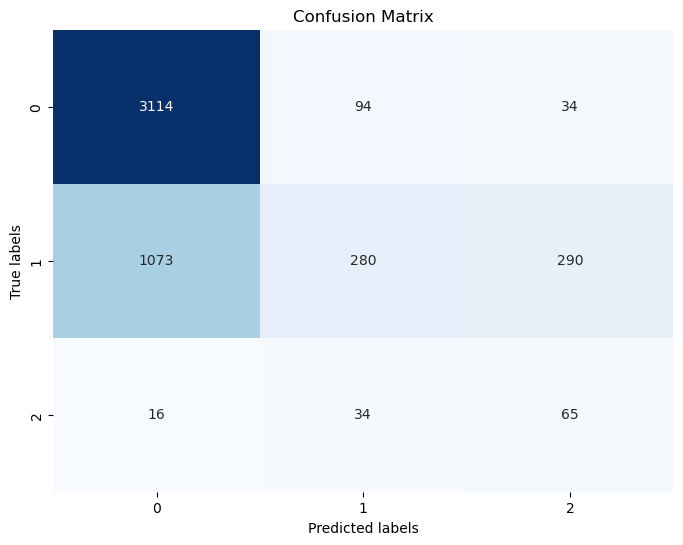

              precision    recall  f1-score   support

         0.0       0.74      0.96      0.84      3242
         1.0       0.69      0.17      0.27      1643
         2.0       0.17      0.57      0.26       115

    accuracy                           0.69      5000
   macro avg       0.53      0.57      0.46      5000
weighted avg       0.71      0.69      0.64      5000



In [293]:
cm = confusion_matrix(mock_y, mock_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

classification_knn = (classification_report(mock_y, mock_y_pred))
print(classification_knn)

In [294]:
# Decision tree
mock_y_pred_dt = decision_tree.predict(mock_X)

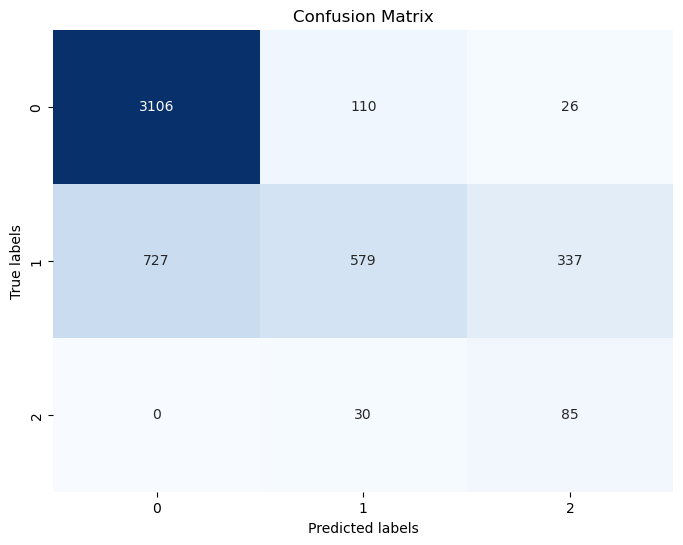

              precision    recall  f1-score   support

         0.0       0.81      0.96      0.88      3242
         1.0       0.81      0.35      0.49      1643
         2.0       0.19      0.74      0.30       115

    accuracy                           0.75      5000
   macro avg       0.60      0.68      0.56      5000
weighted avg       0.79      0.75      0.74      5000



In [295]:
cm = confusion_matrix(mock_y, mock_y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

classification_dt = (classification_report(mock_y, mock_y_pred_dt))
print(classification_dt)

In [296]:
# Random forest
mock_y_pred_rf = rf_classifier.predict(mock_X)

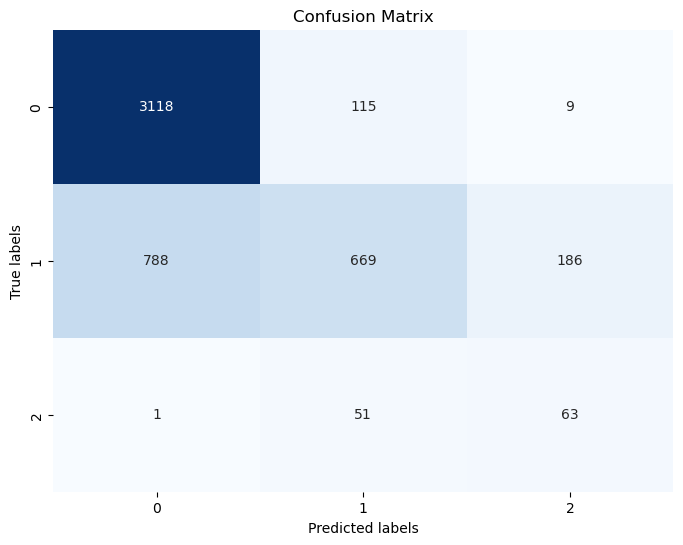

              precision    recall  f1-score   support

         0.0       0.80      0.96      0.87      3242
         1.0       0.80      0.41      0.54      1643
         2.0       0.24      0.55      0.34       115

    accuracy                           0.77      5000
   macro avg       0.61      0.64      0.58      5000
weighted avg       0.79      0.77      0.75      5000



In [297]:
cm = confusion_matrix(mock_y, mock_y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

classification_rf = (classification_report(mock_y, mock_y_pred_rf))
print(classification_rf)

In [298]:
# Naive bayes
mock_y_pred_nb = nb_classifier.predict(mock_X)

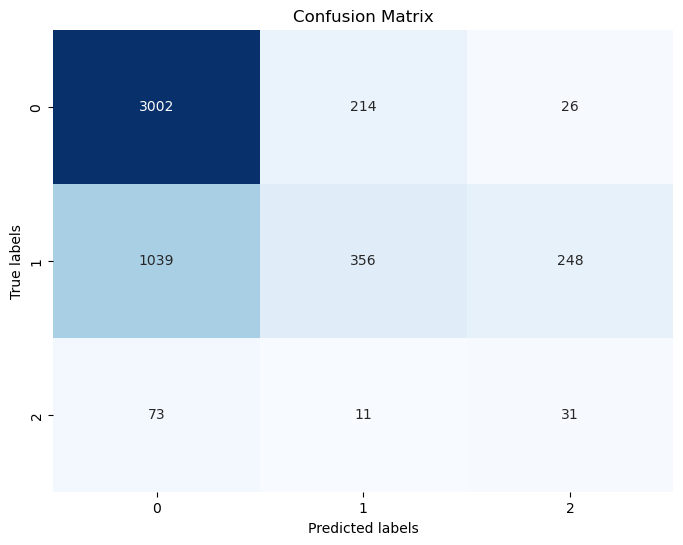

              precision    recall  f1-score   support

         0.0       0.73      0.93      0.82      3242
         1.0       0.61      0.22      0.32      1643
         2.0       0.10      0.27      0.15       115

    accuracy                           0.68      5000
   macro avg       0.48      0.47      0.43      5000
weighted avg       0.68      0.68      0.64      5000



In [299]:
cm = confusion_matrix(mock_y, mock_y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

classification_nb = (classification_report(mock_y, mock_y_pred_nb))
print(classification_nb)

In [304]:
#Logistic Regression
mock_y_pred_lr = log_reg.predict(mock_X)

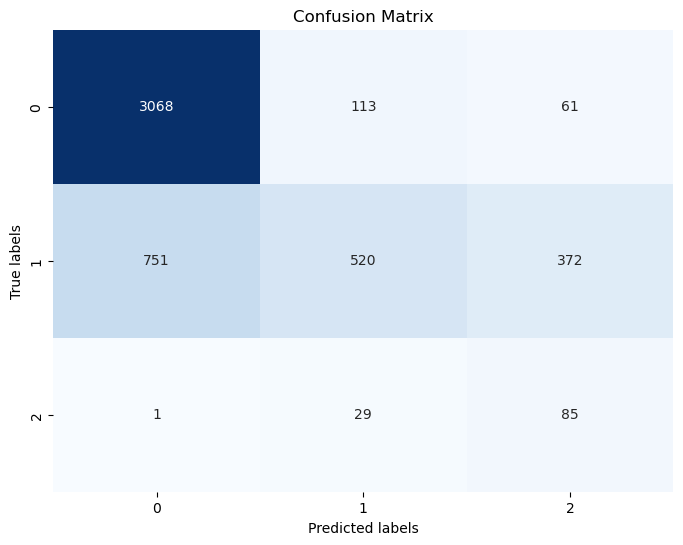

              precision    recall  f1-score   support

         0.0       0.80      0.95      0.87      3242
         1.0       0.79      0.32      0.45      1643
         2.0       0.16      0.74      0.27       115

    accuracy                           0.73      5000
   macro avg       0.58      0.67      0.53      5000
weighted avg       0.78      0.73      0.72      5000



In [305]:
cm = confusion_matrix(mock_y, mock_y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

classification_lr = (classification_report(mock_y, mock_y_pred_lr))
print(classification_lr)

In [306]:
# Calculate evaluation metrics for KNN classifier
mock_accuracy_knn = accuracy_score(mock_y, mock_y_pred)
mock_precision_knn = precision_score(mock_y, mock_y_pred, average='macro')
mock_recall_knn = recall_score(mock_y, mock_y_pred, average='macro')
mock_f1_knn = f1_score(mock_y, mock_y_pred, average='macro')

# Calculate evaluation metrics for Decision Tree classifier
mock_accuracy_dt = accuracy_score(mock_y, mock_y_pred_dt)
mock_precision_dt = precision_score(mock_y, mock_y_pred_dt, average='macro')
mock_recall_dt = recall_score(mock_y, mock_y_pred_dt, average='macro')
mock_f1_dt = f1_score(mock_y, mock_y_pred_dt, average='macro')

# Calculate evaluation metrics for Random Forest classifier
mock_accuracy_rf = accuracy_score(mock_y, mock_y_pred_rf)
mock_precision_rf = precision_score(mock_y, mock_y_pred_rf, average='macro')
mock_recall_rf = recall_score(mock_y, mock_y_pred_rf, average='macro')
mock_f1_rf = f1_score(mock_y, mock_y_pred_rf, average='macro')

# Calculate evaluation metrics for Naive Bayes classifier
mock_accuracy_nb = accuracy_score(mock_y, mock_y_pred_nb)
mock_precision_nb = precision_score(mock_y, mock_y_pred_nb, average='macro')
mock_recall_nb = recall_score(mock_y, mock_y_pred_nb, average='macro')
mock_f1_nb = f1_score(mock_y, mock_y_pred_nb, average='macro')

# Calculate evaluation metrics for Logistic Regression
mock_accuracy_lr = accuracy_score(mock_y, mock_y_pred_nb)
mock_precision_lr = precision_score(mock_y, mock_y_pred_nb, average='macro')
mock_recall_lr = recall_score(mock_y, mock_y_pred_nb, average='macro')
mock_f1_lr = f1_score(mock_y, mock_y_pred_nb, average='macro')

resume = pd.DataFrame({
    'k-NN Classifier': [mock_accuracy_knn, mock_precision_knn, mock_recall_knn, mock_f1_knn],
    'Decision Tree Classifier': [mock_accuracy_dt, mock_precision_dt, mock_recall_dt, mock_f1_dt],
    'Random Forest Classifier': [mock_accuracy_rf, mock_precision_rf, mock_recall_rf, mock_f1_rf],
    'Naive bayes Classifier': [mock_accuracy_nb, mock_precision_nb, mock_recall_nb, mock_f1_nb],
    'Logistic Regression': [mock_accuracy_lr, mock_precision_lr, mock_recall_lr, mock_f1_lr],
}, index=['Accuracy', 'Precision', 'Recall', 'F1-score'])

print(resume)

           k-NN Classifier  Decision Tree Classifier  \
Accuracy          0.691800                  0.754000   
Precision         0.531423                  0.601783   
Recall            0.565385                  0.683195   
F1-score          0.455836                  0.556746   

           Random Forest Classifier  Naive bayes Classifier  \
Accuracy                   0.770000                0.677800   
Precision                  0.614479                0.481360   
Recall                     0.638920                0.470738   
F1-score                   0.583348                0.427989   

           Logistic Regression  
Accuracy              0.677800  
Precision             0.481360  
Recall                0.470738  
F1-score              0.427989  
